In [2]:
from langgraph.graph import StateGraph
from typing import TypedDict, List

In [3]:
class AgentState(TypedDict):
    name : str
    age : int
    skills : List[str]
    final : str

In [5]:
# creating multiple nodes
def node1(state: AgentState) -> AgentState:
    """This node greets the user"""

    state['final'] = f"{state['name']}, Welcome to the system! "

    return state

def node2(state : AgentState) -> AgentState:
    """This node describes the age of the user"""

    state['final'] += f"You are {state['age']} years old! "

    return state

def node3(state: AgentState) -> AgentState:
    """This node lists down the skills of the user into the final state"""

    state['final'] += f"You have skills in: {', '.join(state['skills'][:-1])} and {state['skills'][-1]}"

    return state


In [6]:
# creating a graph
graph = StateGraph(AgentState)

# adding nodes;
graph.add_node("greeter", node1)
graph.add_node("age", node2)
graph.add_node("skills", node3)

# connect the nodes using the edges
graph.add_edge("greeter","age")
graph.add_edge("age","skills")

# set start and end node
graph.set_entry_point("greeter")
graph.set_finish_point("skills")

# compile the graph
app = graph.compile()

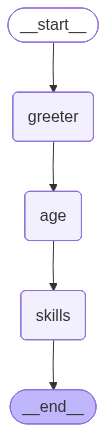

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
results = app.invoke(
    {
        "name" : "Linda",
        "age" : 31,
        "skills" : ["Python", "Machine Learning", "LangGraph"]
    }
)

In [9]:
print(results)

{'name': 'Linda', 'age': 31, 'skills': ['Python', 'Machine Learning', 'LangGraph'], 'final': 'Linda, Welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning and LangGraph'}
